## Background
We are a small startup focusing mainly on providing machine learning solutions in the European banking market. We work on a variety of problems including fraud detection, sentiment classification, and customer intention prediction and classification.

We are interested in developing a robust machine learning system that leverages information coming from call center data.

Ultimately, we are looking for ways to improve the success rate for calls made to customers for any product that our clients offer. Towards this goal, we are working on designing an ever-evolving machine learning product that offers high success outcomes while offering interpretability for our clients to make informed decisions.

## Data

The data comes from the direct marketing efforts of a European banking institution. The marketing campaign involves making a phone call to a customer, often multiple times to ensure a product subscription, in this case, a term deposit. Term deposits are usually short-term deposits with maturities ranging from one month to a few years. The customer must understand when buying a term deposit that they can withdraw their funds only after the term ends. All customer information that might reveal personal information is removed due to privacy concerns.

### Features:

    • age: age of customer (numeric)
    • job: type of job (categorical)
    • marital: marital status (categorical)
    • education: (categorical)
    • default: has credit in default? (binary)
    • balance: average yearly balance, in euros (numeric)
    • housing: has a housing loan? (binary)
    • loan: has a personal loan? (binary)
    • contact: contact communication type (categorical)
    • day: last contact day of the month (numeric)
    • month: last contact month of the year (categorical)
    • duration: last contact duration, in seconds (numeric)
    • campaign: number of contacts performed during this campaign and for this client (numeric, includes the last contact)
    
### Target:

    • y - has the client subscribed to a term deposit? (binary)

## Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

### Success Metric(s):
**Hit %81** or above accuracy by evaluating with **5-fold** cross-validation and reporting the average performance score.

### Bonus(es):
- We are also interested in finding customers who are **more likely** to buy the investment product. Determine the **segment(s)** of customers our client should prioritize.
- What makes the customers buy? Tell us **which feature** we should be focusing more on.

## 0. Import the necessary libraries

In [2]:
# To ignore warnings
import warnings

# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms to use
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import tree

# Metrics to evaluate the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score

# For tuning the model
from sklearn.model_selection import GridSearchCV

# To ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# loading in datasets
df = pd.read_csv('term-deposit-marketing-2020.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
# Checking summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40000.0,40.544600,9.641776,19.0,33.0,39.0,48.0,95.0
balance,40000.0,1274.277550,2903.769716,-8019.0,54.0,407.0,1319.0,102127.0
day,40000.0,16.017225,8.278127,1.0,8.0,17.0,21.0,31.0
duration,40000.0,254.824300,259.366498,0.0,100.0,175.0,313.0,4918.0
campaign,40000.0,2.882175,3.239051,1.0,1.0,2.0,3.0,63.0


## **1. Initial Observations:**
- There are **40,000** observations and **13** columns.
- There are **no null values** in the data.
- There are **5 numerical** columns and the rest are **categorical**.
- The output **y** column is a categorical column containing yes or no indicating whether or not the customer has subscribed to a term loan.  We will use this column as our **label**. 

### Let's explore the distribution of all the numerical columns

In [22]:
# Creating a list of numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

age
Skew : 0.44


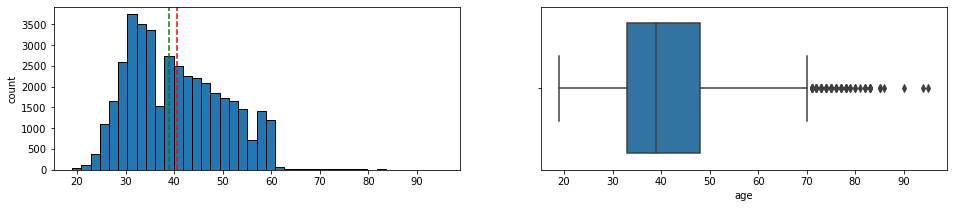

balance
Skew : 8.26


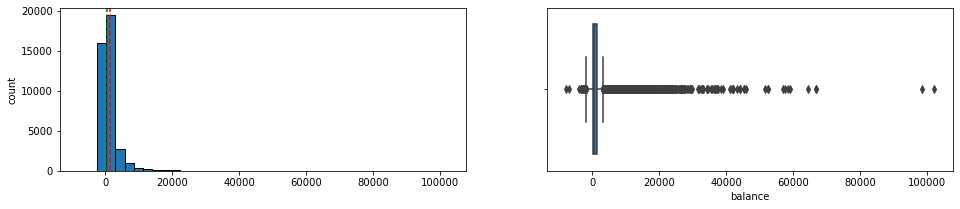

day
Skew : 0.07


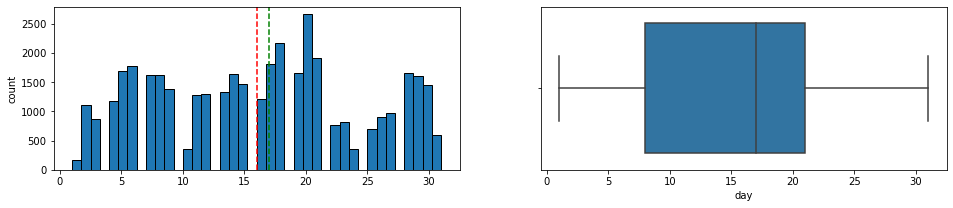

duration
Skew : 3.17


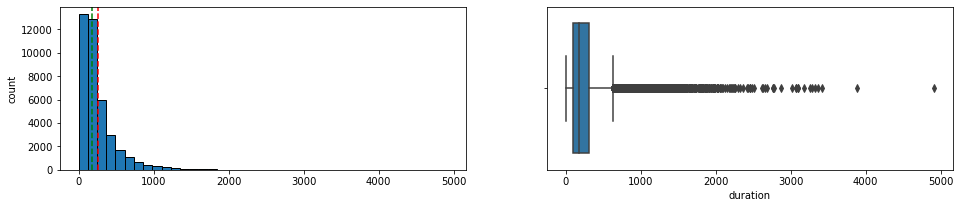

campaign
Skew : 4.73


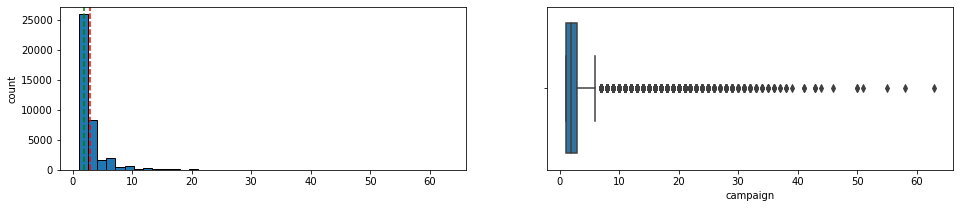

In [23]:
# Plotting a histogram and boxplot to check the distribution of our numerical data
cont_cols = list(df[num_cols])
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(16,3))
    plt.subplot(1,2,1)
    df[col].hist(bins=40, grid=False, ec='black')
    plt.axvline(x = df[col].mean(), linestyle ="--", color ='red')
    plt.axvline(x = df[col].median(), linestyle ="--", color ='green')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

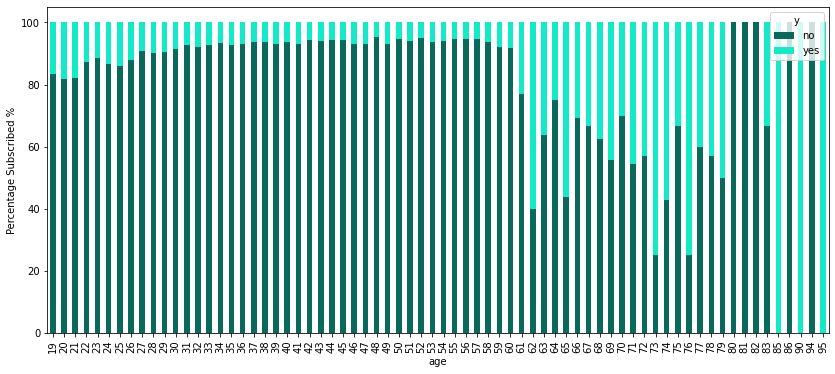

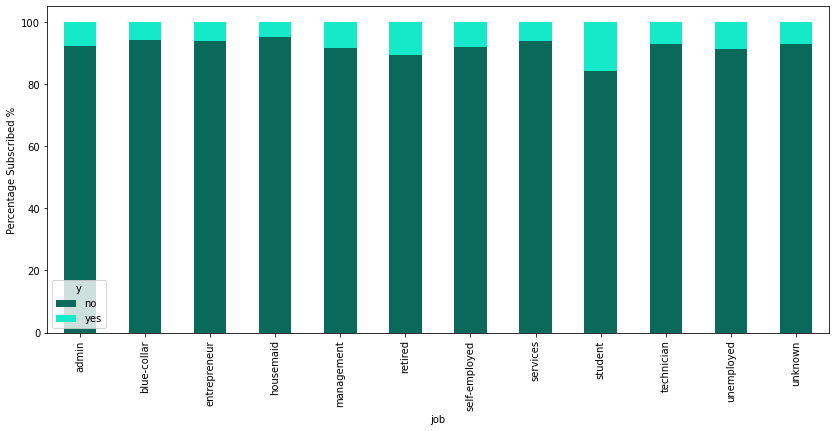

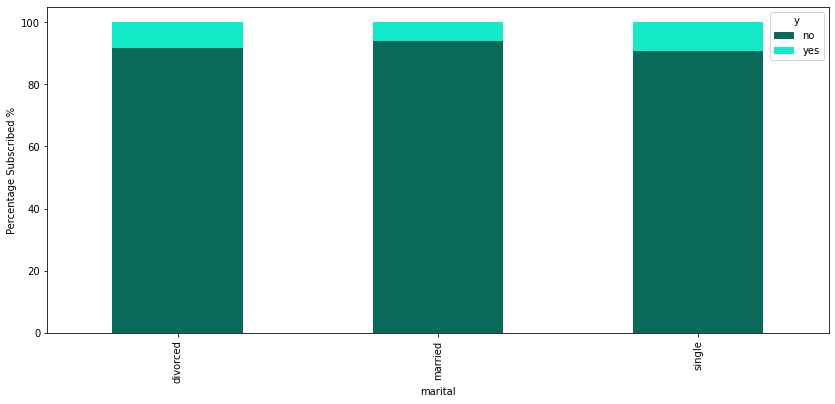

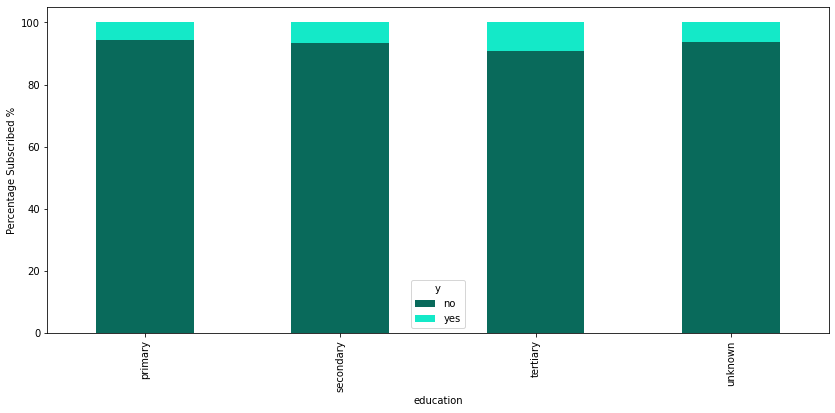

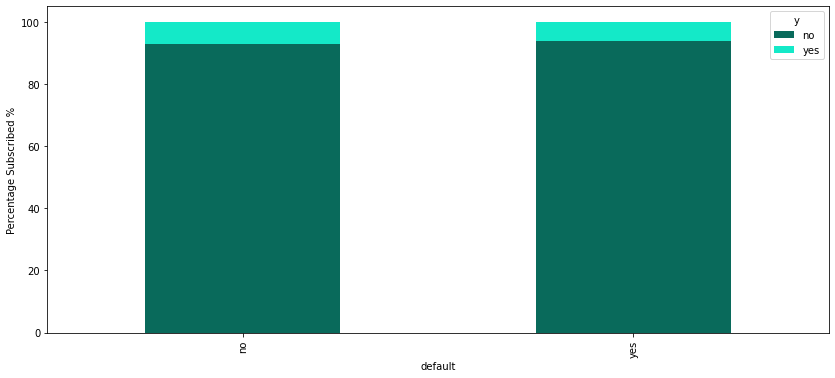

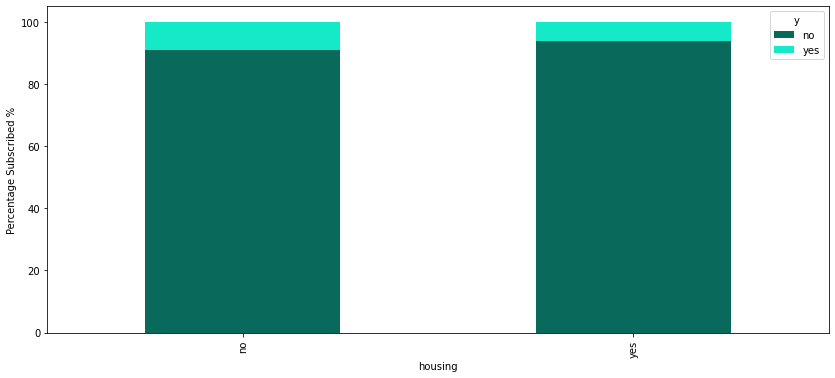

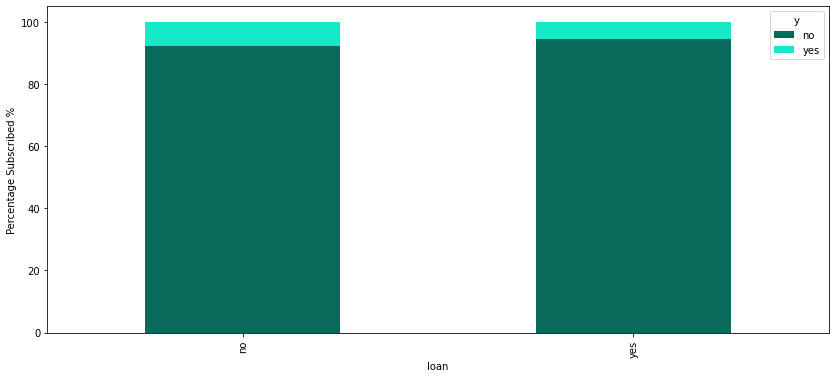

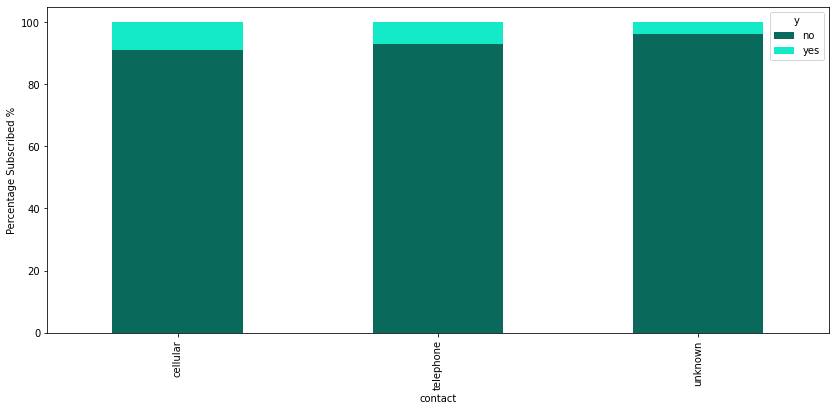

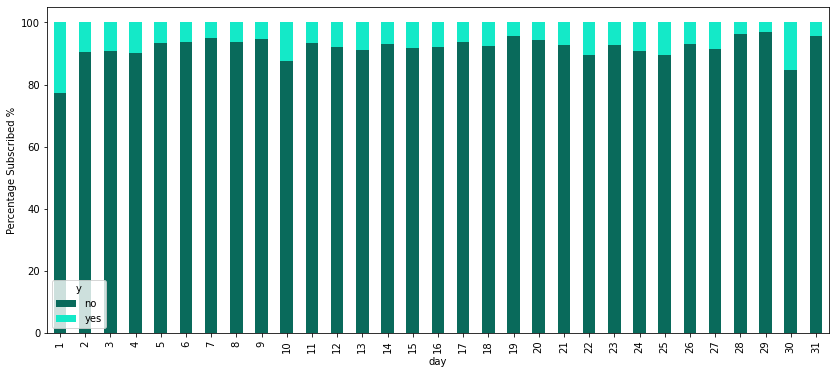

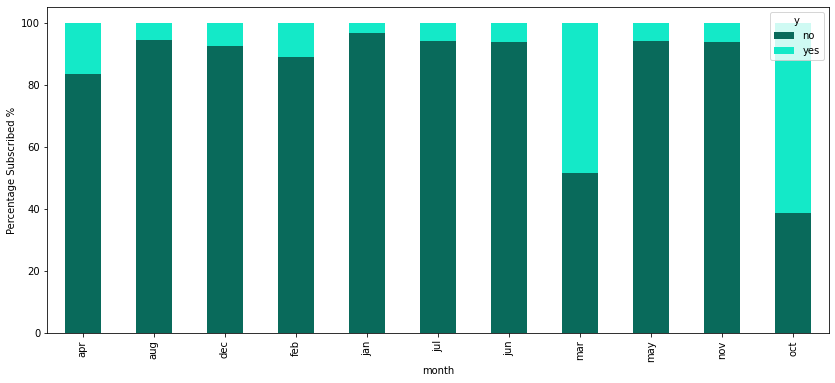

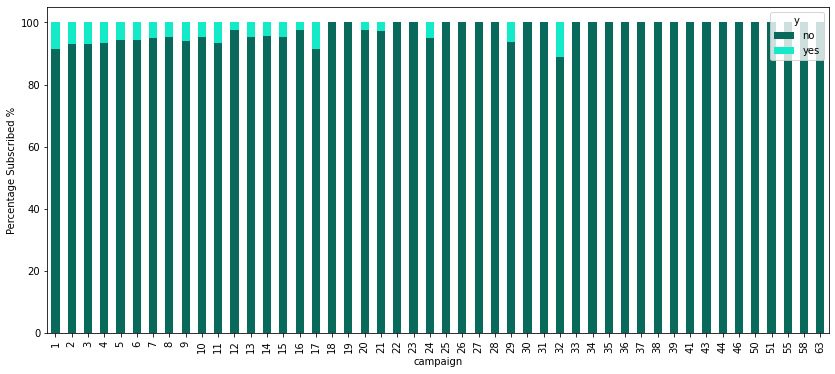

In [37]:
colors = ['#096a5b', '#14e9c8']
for i in cols:
    if i not in ['y', 'balance', 'duration']:
        (pd.crosstab(df[i],df['y'],normalize='index')*100).plot(kind='bar',figsize=(14,6),stacked=True, 
                                                                color = colors)
        plt.ylabel('Percentage Subscribed %')

In [38]:
# Let's create a column that combines our age groups into decades 
bins = [19, 30, 40, 50, 60, 70, 80, 90]
age_range = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90+']

d = dict(enumerate(age_range, 1))

df['AgeRange'] = np.vectorize(d.get)(np.digitize(df['age'], bins))

In [39]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y,AgeRange
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no,40-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no,30-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no,40-50
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no,50-60
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes,30-40
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes,50-60
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no,30-40


Text(0, 0.5, 'Percentage Subscribed %')

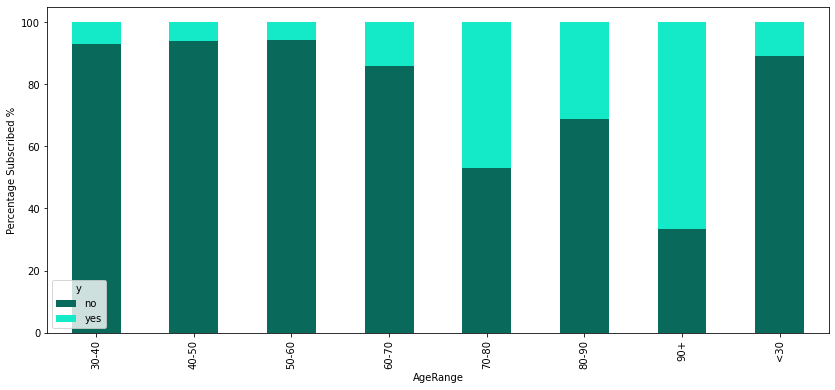

In [55]:
colors = ['#096a5b', '#14e9c8']

(pd.crosstab(df['AgeRange'],df['y'],normalize='index')*100).plot(kind='bar',figsize=(14,6),stacked=True, 
                                                        color = colors)
plt.ylabel('Percentage Subscribed %')

In [60]:
# Counting the Total Number of Applicants per age group
df[df['y']== 'yes'].groupby(['AgeRange','y']).size().reset_index(name='count')

,AgeRange,y,count
0,30-40,yes,1181
1,40-50,yes,671
2,50-60,yes,448
3,60-70,yes,91
4,70-80,yes,33
5,80-90,yes,5
6,90+,yes,2
7,<30,yes,465


### Let's Look Label Class Distribution

In [6]:
# Getting a count of churn column
df['y'].value_counts()

no     37104
yes     2896
Name: y, dtype: int64

In [10]:
non_subscriber = df['y'].value_counts()[0]
subscriber = df['y'].value_counts()[1]

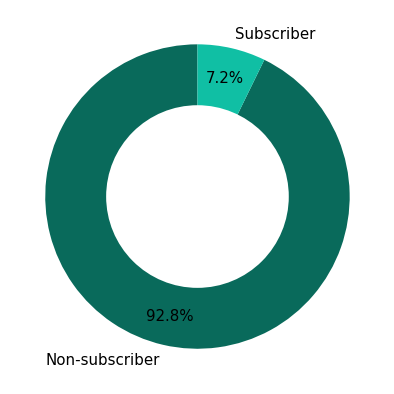

In [35]:
# Graphing our labelled categories
category_names = ['Non-subscriber', 'Subscriber']
sizes = [non_subscriber, subscriber]
colors = ['#096a5b', '#10bfa4']

plt.figure(figsize = (7, 7))
plt.pie(sizes, labels = category_names, textprops = {'fontsize': 15}, startangle=90, 
        autopct='%1.1f%%', colors = colors, pctdistance=0.8)

center_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(center_circle)

plt.show()

**Observations:**
- We have an **highly imbalanced class** of applicant verse non-applicants, as typical in these studies.  We will need to adjust for this when we build our models later.
- Percentage wise it looks like people **over the age of 60** have a higher rate of apply for term loan.  But our distribution of customers show that we don't have as many customers over 60 - so even though it's a higher percentage, it only accounts of a smaller number of applicants in comparison.   
- It **may be** that if we add more customers above 60, it may bring in more applicants or it could mean that as we bring in more customers above 60, the application percentage will begin to match the other age groups.  This could be an area to research.
- There are higher percentage of applicants among those who **don't own homes** and who **don't have loans** - it's possible that these have more available money to save.
- **Students and Retirees** seem to have higher percentage rates of term loan applicants.  
- Also customers whose last month contacted in **March** or **October** have higher applicant rate. **Again**, these may again be explained as above that lower volumn skews that percentage higher or it could indicate an area to study to see if this group yields higher applicant rates.
- In terms of **how many contacts** during a campaign it seems that it's **no longer effective** after **30** contacts.  

## 2. Building our Models

In [43]:
# We want to use lazypredict to test out a vast array of models to see which has the best performance
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [44]:
# Instantiating LazyClassifier (For Classification Problem.  LazyPredict also has the LazyRegressor for Regression Problems)
from lazypredict.Supervised import LazyClassifier


In [45]:
# Separating target variable and other variables
Y = df.y
X = df.drop(columns = ['y'])

In [46]:
# Splitting the data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=1,stratify=Y)

In [47]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [01:48<00:00,  3.75s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    0.87               0.78    None      0.89   
Perceptron                         0.92               0.77    None      0.92   
LGBMClassifier                     0.94               0.70    None      0.93   
LinearDiscriminantAnalysis         0.93               0.70    None      0.93   
DecisionTreeClassifier             0.92               0.69    None      0.92   
XGBClassifier                      0.93               0.69    None      0.93   
QuadraticDiscriminantAnalysis      0.84               0.68    None      0.86   
BaggingClassifier                  0.93               0.66    None      0.92   
PassiveAggressiveClassifier        0.93               0.65    None      0.92   
AdaBoostClassifier                 0.93               0.65    None      0.92   
RandomForestClassifier             0.93 

**Model Performance**

Our **top 6 best** performing models are NearestCentroid, Perceptron, LGBMClassifier, LinearDiscriminantAnalysis, DecisionTreeClassifier and XGBClassifier.  We will develope these models in depth.  